# Import libraries


In [0]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dataset

## Download dataset

In [0]:
!wget --output-document=Apple\ Financial\ Report.csv "https://drive.google.com/uc?export=download&id=1m0fbb8VjaCU1Ye9N_hs85z7HWNk0GA9s"

--2020-04-20 05:33:59--  https://drive.google.com/uc?export=download&id=1m0fbb8VjaCU1Ye9N_hs85z7HWNk0GA9s
Resolving drive.google.com (drive.google.com)... 74.125.20.100, 74.125.20.101, 74.125.20.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.20.100|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g84vr1q8dtloskmp6nt8v8oms3i26lqf/1587360825000/08674965411100473451/*/1m0fbb8VjaCU1Ye9N_hs85z7HWNk0GA9s?e=download [following]
--2020-04-20 05:33:59--  https://doc-0k-9c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/g84vr1q8dtloskmp6nt8v8oms3i26lqf/1587360825000/08674965411100473451/*/1m0fbb8VjaCU1Ye9N_hs85z7HWNk0GA9s?e=download
Resolving doc-0k-9c-docs.googleusercontent.com (doc-0k-9c-docs.googleusercontent.com)... 74.125.20.132, 2607:f8b0:400e:c07::84
Connecting to doc-0k-9c-docs.googleusercontent.com (doc-0k-9c-d

## Load Dataset

In [0]:
def load_unicef_data():
    
    fname = 'Apple Financial Report.csv'

    # Uses pandas to help with string-NaN-numeric data.
    data = pd.read_csv(fname, na_values='_', encoding='latin1')
    # Strip countries title from feature names.
    features = data.axes[1][1:]
    # Separate country names from feature values.
    quarters = data.values[:,0]
    values = data.values[:,1:]
    # Convert to numpy matrix for real.
    values = np.asmatrix(values,dtype='float32')

    # Modify NaN values (missing values).
    mean_vals = np.nanmean(values, axis=0)
    inds = np.where(np.isnan(values))
    values[inds] = np.take(mean_vals, inds[1])
    return (quarters, features, values)

In [0]:
(quarters, features, values) = load_unicef_data()

In [0]:
print(quarters)

['2-Q 2005' '3-Q 2005' '4-Q 2005' '1-Q 2006' '2-Q 2006' '3-Q 2006'
 '4-Q 2006' '1-Q 2007' '2-Q 2007' '3-Q 2007' '4-Q 2007' '1-Q 2008'
 '2-Q 2008' '3-Q 2008' '4-Q 2008' '1-Q 2009' '2-Q 2009' '3-Q 2009'
 '4-Q 2009' '1-Q 2010' '2-Q 2010' '3-Q 2010' '4-Q 2010' '1-Q 2011'
 '2-Q 2011' '3-Q 2011' '4-Q 2011' '1-Q 2012' '2-Q 2012' '3-Q 2012'
 '4-Q 2012' '1-Q 2013' '2-Q 2013' '3-Q 2013' '4-Q 2013' '1-Q 2014'
 '2-Q 2014' '3-Q 2014' '4-Q 2014' '1-Q 2015' '2-Q 2015' '3-Q 2015'
 '4-Q 2015' '1-Q 2016' '2-Q 2016' '3-Q 2016' '4-Q 2016' '1-Q 2017'
 '2-Q 2017' '3-Q 2017' '4-Q 2017' '1-Q 2018' '2-Q 2018' '3-Q 2018'
 '4-Q 2018' '1-Q 2019' '2-Q 2019' '3-Q 2019' '4-Q 2019' '1-Q 2020']


In [0]:
print(features)

Index(['Net Income', 'Net Sales /Revenue', 'Cost of Sales',
       'Operating Expenses', 'Operating Income', 'Net Sales By iPhone',
       'Net Sales By iPad', 'Net Sales By Mac', 'Net Sales By Service',
       'Net Sales By Wearables, Home and Accessories \n',
       'If new product comes out (iPhone)', 'If new product comes out (iPad)',
       'If new product comes out (Mac)',
       'If new product comes out (Wearables, Home and Accessories)',
       'New Revolutional technique'],
      dtype='object')


In [0]:
print(values)

[[2.9000000e+02 3.2430000e+03 2.2750000e+03 2.8410000e+03 4.0200000e+02
  3.3526699e+04 6.0049331e+03 6.0915000e+03 6.9332002e+03 3.3701379e+03
  0.0000000e+00 0.0000000e+00 1.0000000e+00 1.0000000e+00 0.0000000e+00]
 [3.1900000e+02 3.5200000e+03 2.4760000e+03 3.0940000e+03 4.2600000e+02
  3.3526699e+04 6.0049331e+03 6.0915000e+03 6.9332002e+03 3.3701379e+03
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]
 [4.2400000e+02 3.6780000e+03 2.6440000e+03 3.2660000e+03 4.1200000e+02
  3.3526699e+04 6.0049331e+03 6.0915000e+03 6.9332002e+03 3.3701379e+03
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [5.6500000e+02 5.7490000e+03 4.1850000e+03 4.9990000e+03 7.5000000e+02
  3.3526699e+04 6.0049331e+03 6.0915000e+03 6.9332002e+03 3.3701379e+03
  0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [4.1000000e+02 4.3590000e+03 3.0620000e+03 3.8300000e+03 5.2900000e+02
  3.3526699e+04 6.0049331e+03 6.0915000e+03 6.9332002e+03 3.

## Seperate dataset to train set and test set

In [0]:
targets = values[:,0]
x = values[:,2:]

N_TRAIN = 50
q_train = quarters[0:N_TRAIN]
q_test = quarters[N_TRAIN:]
x_train = torch.from_numpy(x[0:N_TRAIN,:])
x_test = torch.from_numpy(x[N_TRAIN:,:])
t_train = torch.from_numpy(targets[0:N_TRAIN])
t_test = targets[N_TRAIN:]

# Create MLP model

In [0]:
class Model(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super().__init__()
        self.l1 = nn.Linear(D_in, H)
        self.relu = nn.ReLU()
        self.l2=nn.Linear(H, D_out)

    def forward(self, X):
        return self.l2(self.relu(self.l1(X)))

In [0]:
D_in = 13
H = 10
D_out = 1

model = Model(D_in, H, D_out)


In [0]:
print(model)

Model(
  (l1): Linear(in_features=13, out_features=10, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=10, out_features=1, bias=True)
)


# Train the model

In [0]:


loss_fn = torch.nn.MSELoss()

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algoriths. The first argument to the Adam constructor tells the
# optimizer which Tensors it should update.
learning_rate = 0.0005
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for t in range(5000):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x_train)

    # Compute and print loss.
    loss = loss_fn(y_pred, t_train)
    if (t+1)%100 == 0:
      print(t, loss.item())
    if loss.item() <= 41000:
      print(t, loss.item())
      break

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()

99 14732201.0
199 4897523.5
299 1402761.0
399 576789.0
499 447249.6875
599 406411.6875
699 383769.84375
799 366944.75
899 350217.09375
999 333321.84375
1099 316263.65625
1199 299103.53125
1299 281926.3125
1399 264824.46875
1499 247893.9375
1599 231234.8125
1699 214948.359375
1799 199136.0
1899 183897.9375
1999 169329.6875
2099 155517.75
2199 142536.796875
2299 130465.59375
2399 119401.421875
2499 109278.9609375
2599 100034.2734375
2699 91597.609375
2799 83894.5703125
2899 76851.65625
2999 70388.1328125
3099 64434.53515625
3199 58924.44140625
3299 53850.67578125
3399 49206.4609375
3499 44959.85546875
3599 41091.171875
3602 40980.80859375


In [0]:
y = model(x_test)
y_train = model(x_train)
print(y)

tensor([[10005.1016],
        [20684.2500],
        [12709.4473],
        [10313.2031],
        [12549.7207],
        [18823.1504],
        [11217.8604],
        [ 9723.7266],
        [12633.8848],
        [21053.1348]], grad_fn=<AddmmBackward>)


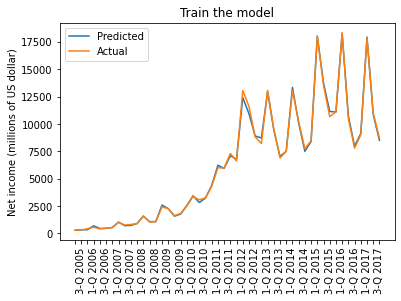

In [0]:
plt.title('Train the model')
plt.plot(q_train, y_train.detach().numpy())
plt.plot(q_train, t_train)
plt.legend(['Predicted', 'Actual'])
plt.ylabel('Net income (millions of US dollar)') 
plt.xticks(rotation=90)
ax = plt.gca()
for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

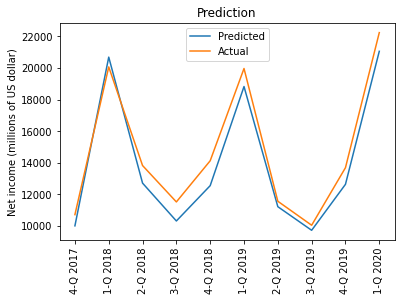

In [0]:
plt.title('Prediction')
plt.plot(q_test, y.detach().numpy())
plt.plot(q_test, t_test)
plt.ylabel('Net income (millions of US dollar)') 
plt.legend(['Predicted', 'Actual'])
plt.xticks(rotation=90)

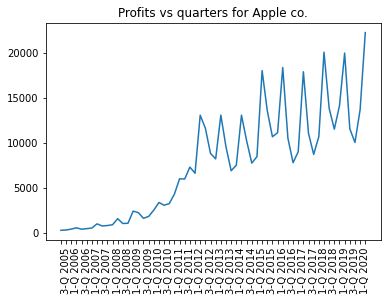

In [0]:
plt.title('Profits vs quarters for Apple co.')
plt.plot(quarters, targets)
plt.xticks(rotation=90)
ax = plt.gca()
for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)